# __Create wells and tunnels__

### Problem statement

Wells and tunnels are important objects to consider in DFN modeling, as they are supports for real fracture sampling. 
<br>
They can also be used as a support to apply boundary conditions for physical process simulations.

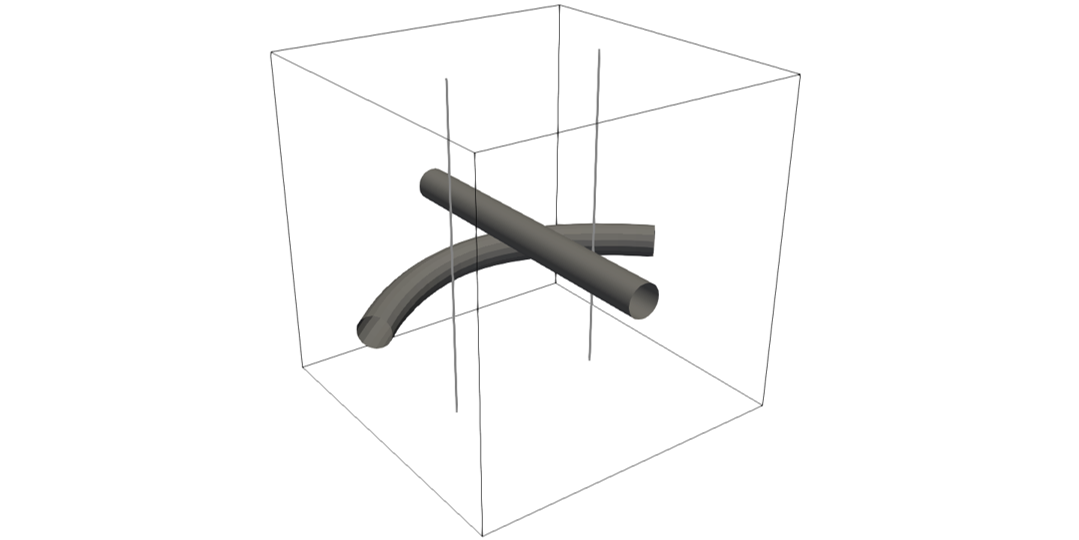
<center>Wells and tunnels</center>

### What will you learn ?
- Create a well
- Create a cylindrical tunnel
- Create a tunnel from geometry file (STL format)

### DFN.Lab model

Wells and tunnels are geometrical objects that must be associated to the DFN system to perform connectivity analysis or simulation of physical processes.

The required modules are __Basis__ and __DataAnalysis__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization in our notebook.
<br>
We use [_matplotlib_](https://matplotlib.org) and [_mplstereonet_](https://github.com/joferkington/mplstereonet) to construct plots.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](https://gitlab.com/fractorylab/dfnlab/-/blob/new_tutos/Tutorials/sources/functions.py).


In [1]:
import dfnlab.Basis as basis
import dfnlab.DataAnalysis as data
import os

--------------------------------

### Create system
We first need to create a DFN system to attach wells and tunnels with.

In [2]:
system = basis.System()
system.buildParallelepiped([0, 0, 0], 1.)

### Create wells

Here we create two linear and parallel wells crossing the DFN system and attach them to the defined system.

In [3]:
positionWell1Begin = [-0.25,0.,0.5]
positionWell1End = [-0.25,0.,-0.5]
well1= basis.Well1D(pbegin=positionWell1Begin, pend=positionWell1End)    
system.addGeometry(well1)

positionWell2Begin = [0.25,0.,0.5]
positionWell2End = [0.25,0.,-0.5]
well2= basis.Well1D(pbegin=positionWell2Begin, pend=positionWell2End)
system.addGeometry(well2)

We can visualize them.

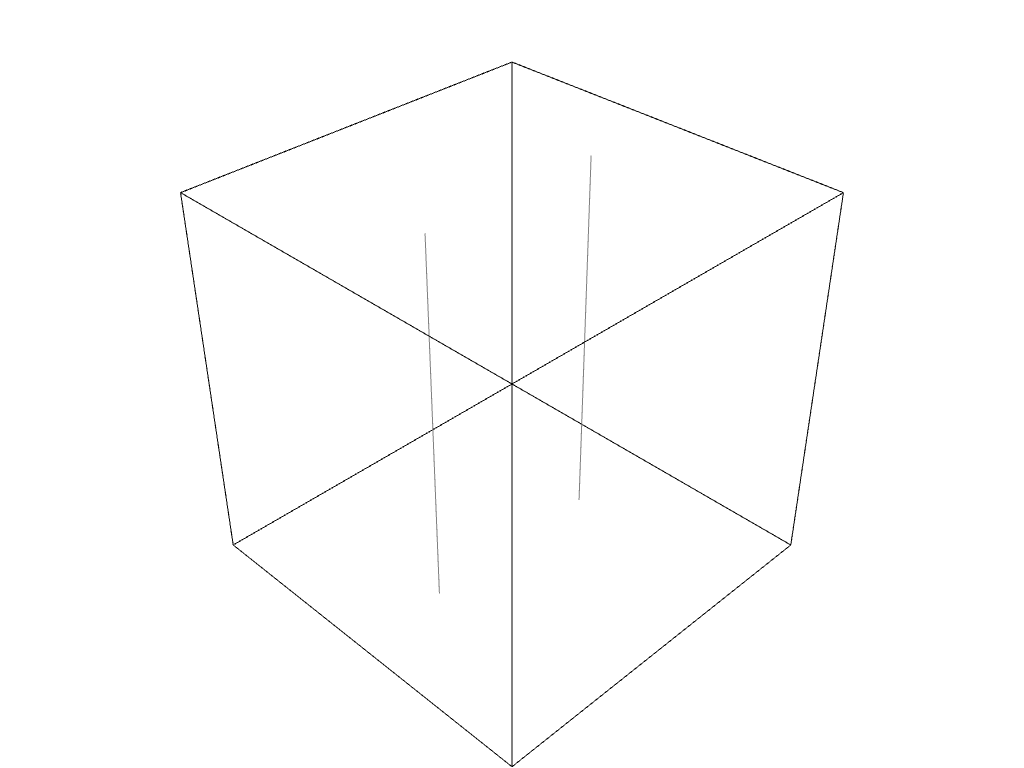

In [4]:
from sources.functions import plot_system

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)

plot_system(system,pathFolder+"/system1")

### Create a cylindrical tunnel
Cylindrical tunnels can be created easily from defined diameter, and starting and ending points.

In [5]:
positionTunnel1Begin = [0.,0.-0.5,0]
positionTunnel1End = [0.,0.5,0]
tunnel1 = basis.Tunnel(position1=positionTunnel1Begin, position2=positionTunnel1End, closed=False, diameter=0.1, index=1)
system.addGeometry(tunnel1)

Visualisation.

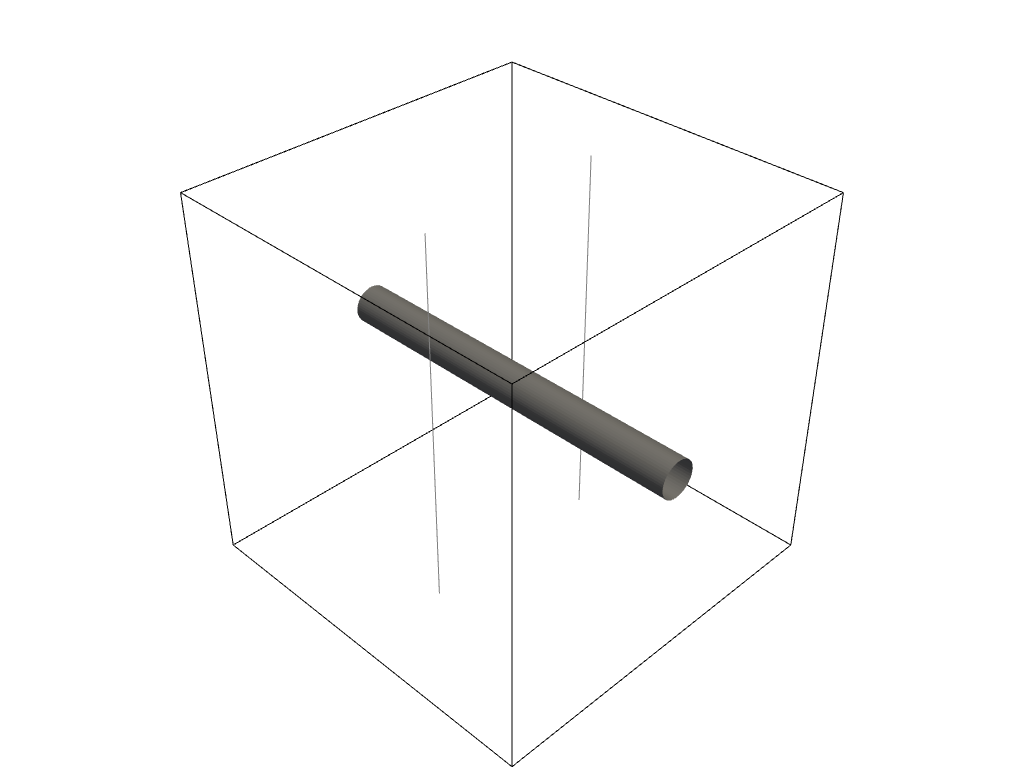

In [6]:
from sources.functions import plot_system

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)

plot_system(system,pathFolder+"/system1")

### Create tunnels from geometry files
You can also create tunnels with complex shapes from STL geometry files.

In [7]:
stlReader = data.STLReader("./sources/tunnel_etienne.stl") 
tunnel2 = basis.Tunnel(stlReader.getIrregularSurface())
system.addGeometry(tunnel2)

Visualisation.

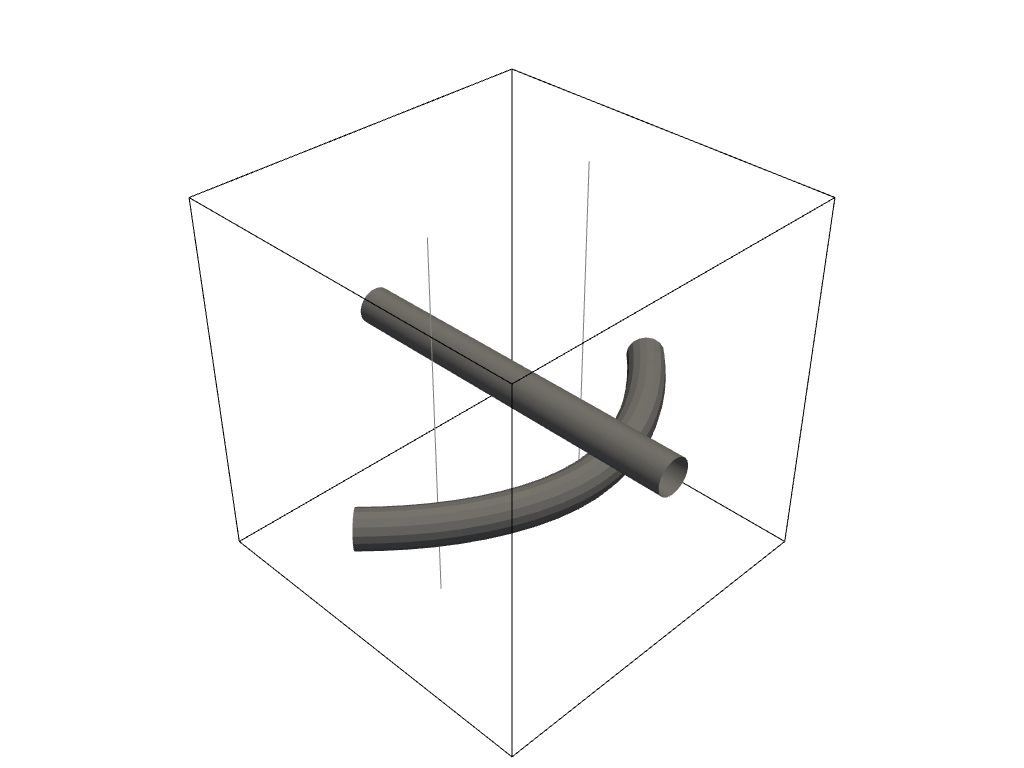

In [8]:
from sources.functions import plot_system

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)

plot_system(system,pathFolder+"/system1")